In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def least_squares_fit(x, y, degree, num_points=None):
    if num_points is None:
        num_points = len(x)  # Используем все точки по умолчанию

    # Выбираем только первые num_points точек для аппроксимации
    x_subset = x[:num_points]
    y_subset = y[:num_points]

    # Создаем матрицу X со степенями x_subset
    X = np.vander(x_subset, degree + 1)

    # Решаем уравнение X^T * X * coeffs = X^T * y_subset для coeffs
    # Решение этой системы линейных уравнений производится для получения коэффициентов coeffs.
    coeffs = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_subset))

    return coeffs

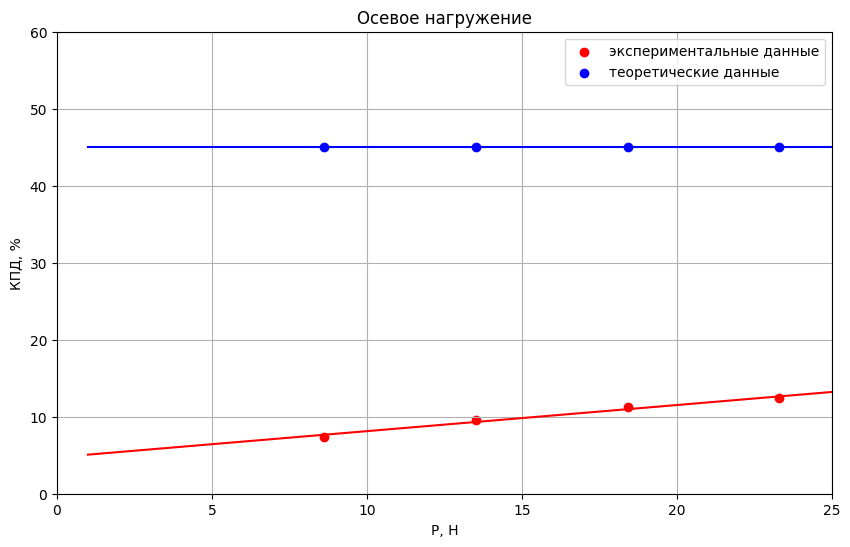

In [20]:
# Для осевого нагружения
P = np.array([8.62, 13.52, 18.42, 23.3])
n_rasch = np.array([45, 45, 45, 45])
n_experiment = np.array([7.4, 9.6, 11.2, 12.4])

degree = 1 # Выбираем степень полинома
coeffs_experiment = least_squares_fit(P, n_experiment, degree)
coeffs_rasch = least_squares_fit(P, n_rasch, degree)

# Создание полинома
poly_exp = np.poly1d(coeffs_experiment)
poly_rasch = np.poly1d(coeffs_rasch)

# Генерация значений для аппроксимации
P_range = np.arange(1, 25 + 1, 1)
n_exp_approximated = poly_exp(P_range)
n_rasch_approximated = poly_rasch(P_range)

plt.figure(figsize=(10, 6))
plt.scatter(P, n_experiment, label='экспериментальные данные', color='red')
plt.plot(P_range, n_exp_approximated, color='red')
plt.scatter(P, n_rasch, label='теоретические данные', color='blue')
plt.plot(P_range, n_rasch_approximated, color='blue')
plt.xlabel('P, H')
plt.ylabel('КПД, %')
plt.xlim([0, 25])
plt.ylim([0, 60])
plt.legend()
plt.grid(True)
plt.title('Осевое нагружение')
plt.show()

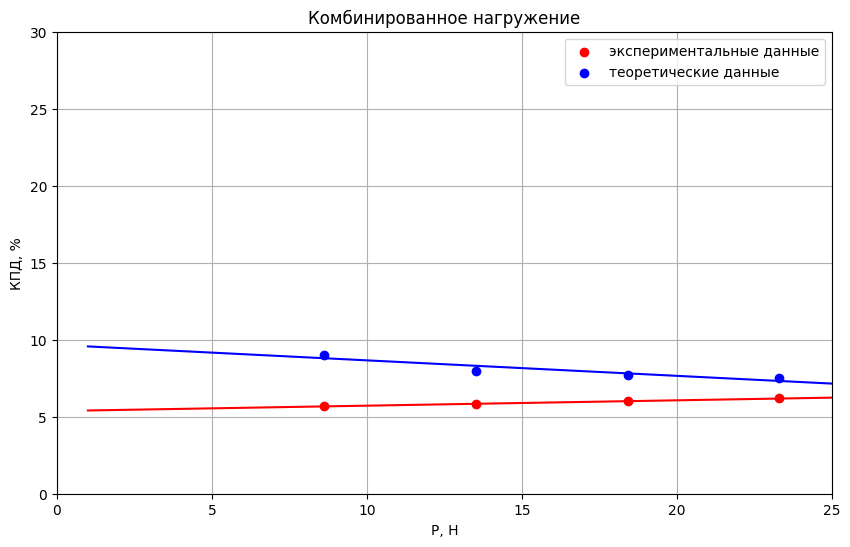

In [22]:
# Для комбинированного нагружения
P = np.array([8.62, 13.52, 18.42, 23.3])
n_rasch = np.array([9.04, 8, 7.7, 7.5])
n_experiment = np.array([5.7, 5.8, 6, 6.2])

degree = 1 # Выбираем степень полинома
coeffs_experiment = least_squares_fit(P, n_experiment, degree)
coeffs_rasch = least_squares_fit(P, n_rasch, degree)

# Создание полинома
poly_exp = np.poly1d(coeffs_experiment)
poly_rasch = np.poly1d(coeffs_rasch)

# Генерация значений для аппроксимации
P_range = np.arange(1, 25 + 1, 1)
n_exp_approximated = poly_exp(P_range)
n_rasch_approximated = poly_rasch(P_range)

plt.figure(figsize=(10, 6))
plt.scatter(P, n_experiment, label='экспериментальные данные', color='red')
plt.plot(P_range, n_exp_approximated, color='red')
plt.scatter(P, n_rasch, label='теоретические данные', color='blue')
plt.plot(P_range, n_rasch_approximated, color='blue')
plt.xlabel('P, H')
plt.ylabel('КПД, %')
plt.xlim([0, 25])
plt.ylim([0, 30])
plt.legend()
plt.grid(True)
plt.title('Комбинированное нагружение')
plt.show()